In [1]:
from rdkit import Chem
from rdkit.Chem import Atom, BondType
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit import DataStructs
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Arial'})

In [2]:
synthia_purple = np.array([80,50,145,255])/255
synthia_blue = np.array([45,190,205,255])/255
synthia_orange = np.array([255,160,0,255])/255
synthia_pink = np.array([235,60,150,255])/255

In [3]:
synthia_cols = [synthia_blue,synthia_orange,synthia_pink,synthia_purple]

In [4]:
def molFromAdjMat(atoms, amat,sanitize=True):
    """Creates a mol object from an adjacency matrix.
    Inputs:
    atoms: list of atomic numbers of atoms, by row
    amat: adjacency matrix. Has to have same length as atoms (obviously)
    Output: mol object
    """
    
    m = Chem.RWMol()
    # add in the separate atoms
    for a in atoms: m.AddAtom(Atom(a))
    side_len = len(amat)    
    for r in range(side_len):
        for c in range(r+1,side_len):
            bond_order = amat[r][c]
            if bond_order > 0:
                if bond_order == 1: m.AddBond(r,c,BondType.SINGLE)
                if bond_order == 2: m.AddBond(r,c,BondType.DOUBLE)
                if bond_order == 3: m.AddBond(r,c,BondType.TRIPLE)

    if sanitize:
        Chem.SanitizeMol(m)
    return m

In [5]:
def get_fps_data(mols):

    fps = [GetMorganFingerprintAsBitVect(m,2,useChirality=True,useFeatures=True) for m in mols]
    pdt_fp = fps[-1]

    all_fps = []

    for fp in fps:

        tanimoto = DataStructs.FingerprintSimilarity(fp,pdt_fp,metric=DataStructs.TanimotoSimilarity)
        dice = DataStructs.FingerprintSimilarity(fp,pdt_fp,metric=DataStructs.DiceSimilarity)
        cosine = DataStructs.FingerprintSimilarity(fp,pdt_fp,metric=DataStructs.CosineSimilarity)
        russel = DataStructs.FingerprintSimilarity(fp,pdt_fp,metric=DataStructs.RusselSimilarity)
        kulczynski = DataStructs.FingerprintSimilarity(fp,pdt_fp,metric=DataStructs.KulczynskiSimilarity)
        mcconnaughey = DataStructs.FingerprintSimilarity(fp,pdt_fp,metric=DataStructs.McConnaugheySimilarity)

        all_fps.append([tanimoto,dice,cosine,russel,kulczynski,mcconnaughey])  

    fps_df = pd.DataFrame(all_fps,columns = ["tanimoto","dice","cosine","russel","kulczynski","mcconnaughey"])
    return fps_df
    

### Experimental Mannich

In [6]:
data = np.load("./matrices/stemo_exp_mannich.npz")
atoms = [int(i) for i in data["atoms"]]
amats = data["amats"]
mols = [molFromAdjMat(atoms,amat) for amat in amats]

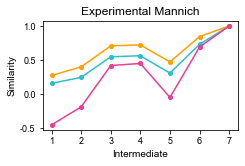

In [7]:
fps_df = get_fps_data(mols)

mks = 4
fs = 9
label_fs = 7

plt.figure(figsize = (3.5,2))
ax = plt.gca()


for i_fp, fp_type in enumerate(["tanimoto","cosine","mcconnaughey"]):
    ax.plot(fps_df[fp_type],marker = "o",color=synthia_cols[i_fp],markersize=mks)
    
ax.set_xticks(range(len(mols)))
ax.set_xticklabels(range(1,len(mols)+1),fontsize=fs)

ax.set_yticks(np.arange(-0.5,1.2,0.5))
ax.set_yticklabels(np.arange(-0.5,1.2,0.5),fontsize=fs)

# ax.legend(["Tanimoto","Cosine","McConnaughey"],bbox_to_anchor=(1, 1.05),fontsize=fs)

ax.set_xlabel("Intermediate",fontsize=10)
ax.set_ylabel("Similarity",fontsize=10)

plt.title("Experimental Mannich",fontsize=12)

plt.savefig("./other_metrics/other_exp_mannich.png",dpi=300,bbox_inches = "tight")


### Experimental Schmidt

In [8]:
data = np.load("./matrices/stemo_exp_schmidt.npz")
atoms = [int(i) for i in data["atoms"]]
amats = data["amats"]
mols = [molFromAdjMat(atoms,amat) for amat in amats]

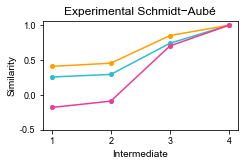

In [9]:
fps_df = get_fps_data(mols)

mks = 4
fs = 9
label_fs = 7

plt.figure(figsize = (3.5,2))
ax = plt.gca()


for i_fp, fp_type in enumerate(["tanimoto","cosine","mcconnaughey"]):
    ax.plot(fps_df[fp_type],marker = "o",color=synthia_cols[i_fp],markersize=mks)
    
ax.set_xticks(range(len(mols)))
ax.set_xticklabels(range(1,len(mols)+1),fontsize=fs)

ax.set_yticks(np.arange(-0.5,1.2,0.5))
ax.set_yticklabels(np.arange(-0.5,1.2,0.5),fontsize=fs)

ax.set_xlabel("Intermediate",fontsize=10)
ax.set_ylabel("Similarity",fontsize=10)


# ax.legend(["Tanimoto","Cosine","McConnaughey"],bbox_to_anchor=(1, 1.05),fontsize=fs)
plt.title("Experimental Schmidt−Aubé",fontsize=12)
plt.savefig("./other_metrics/other_exp_schmidt.png",dpi=300,bbox_inches = "tight")


### Synthia Schmidt


In [10]:
data = np.load("./matrices/stemo_synthia_schmidt.npz")
atoms = [int(i) for i in data["atoms"]]
amats = data["amats"]
mols = [molFromAdjMat(atoms,amat) for amat in amats]

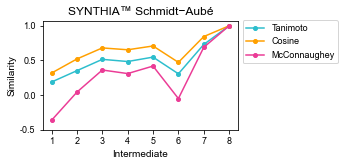

In [11]:
fps_df = get_fps_data(mols)

mks = 4
fs = 9
label_fs = 7

plt.figure(figsize = (3.5,2))
ax = plt.gca()


for i_fp, fp_type in enumerate(["tanimoto","cosine","mcconnaughey"]):
    ax.plot(fps_df[fp_type],marker = "o",color=synthia_cols[i_fp],markersize=mks)
    
ax.set_xticks(range(len(mols)))
ax.set_xticklabels(range(1,len(mols)+1),fontsize=fs)

ax.set_yticks(np.arange(-0.5,1.2,0.5))
ax.set_yticklabels(np.arange(-0.5,1.2,0.5),fontsize=fs)

ax.set_xlabel("Intermediate",fontsize=10)
ax.set_ylabel("Similarity",fontsize=10)

ax.legend(["Tanimoto","Cosine","McConnaughey"],bbox_to_anchor=(1, 1.05),fontsize=fs)
plt.title("SYNTHIA\u2122 Schmidt−Aubé",fontsize=12)
plt.savefig("./other_metrics/other_synthia_schmidt.png",dpi=300,bbox_inches = "tight")

### Synthia Mannich

In [12]:
data = np.load("./matrices/stemo_synthia_mannich.npz")
atoms = [int(i) for i in data["atoms"]]
amats = data["amats"]
mols = [molFromAdjMat(atoms,amat) for amat in amats]

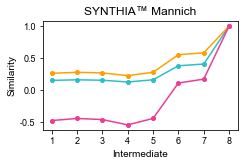

In [13]:
fps_df = get_fps_data(mols)

mks = 4
fs = 9
label_fs = 7

plt.figure(figsize = (3.5,2))
ax = plt.gca()

for i_fp, fp_type in enumerate(["tanimoto","cosine","mcconnaughey"]):
    ax.plot(fps_df[fp_type],marker = "o",color=synthia_cols[i_fp],markersize=mks)
    
ax.set_xticks(range(len(mols)))
ax.set_xticklabels(range(1,len(mols)+1),fontsize=fs)

ax.set_yticks(np.arange(-0.5,1.2,0.5))
ax.set_yticklabels(np.arange(-0.5,1.2,0.5),fontsize=fs)

# ax.legend(["Tanimoto","Cosine","McConnaughey"],bbox_to_anchor=(1, 1.05),fontsize=fs)

ax.set_xlabel("Intermediate",fontsize=10)
ax.set_ylabel("Similarity",fontsize=10)
plt.title("SYNTHIA\u2122 Mannich",fontsize=12)
plt.savefig("./other_metrics/other_synthia_mannich.png",dpi=300,bbox_inches = "tight")